# <center> **Projeto Integrador I** </center>
## <center> Dupla: Larissa Sousa, Ruan Rodrigues</center>

### <center> Análise de sentimentos em comentários de supermercados de Itapajé: entendendo a opinião dos consumidores <center>


---


### Esse projeto consiste na realização uma análise de sentimento (NLP - processamento de linguagem natural) em avaliações e comentários referentes a três principais supermercados da cidade local, são eles: Deirton, Para Ty e Menor Preço.



# Preprocessing

##### O mesmo tratamento que foi realizado no dataset `menor_preco`, foi o mesmo para os outros dois datasets. Por esse motivo, mostraremos o passo a passo somente no primeiro.

## Supermercado Menor preço (C)

### Bibliotecas que serão utilizadas

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px
import seaborn as sns

In [ ]:
menorpreco = pd.read_csv("/content/menorpreco_bd.csv")
menorpreco

,TSUbDb,A503be,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2,QV3IV,Aohxlc 2
0,Joyce Costa,14 comentários,uma semana atrás,"Ambiente super apertado, aspecto de sujo e alg...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN
1,Myname Gondim,8 comentários,um mês atrás,"Muito apertado o local ,mal da pra gente andar...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN
2,Francisco Messias Barbosa de Lima,35 comentários9 fotos,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,Local Guide,·
3,Igor Sousa,3 comentários,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN
4,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,3 anos atrás,Bom local com preços baixos,1.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,Local Guide,·
...,...,...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,6 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Genival Viana,NaN,5 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,Larissa Brioso,339 comentários2.102 fotos,4 anos atrás,NaN,NaN,NaN,NaN,NaN,Local Guide,·
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,3 anos atrás,NaN,NaN,NaN,NaN,NaN,Local Guide,·


### Adicionando as notas

In [ ]:
notas_mp = pd.read_csv("/content/notas_mp.csv")
notas_mp

,nota
0,1
1,2
2,5
3,5
4,5
...,...
180,5
181,5
182,4
183,3


In [ ]:
menorpreco['nota'] = notas_mp['nota']
menorpreco

,TSUbDb,A503be,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2,QV3IV,Aohxlc 2,nota
0,Joyce Costa,14 comentários,uma semana atrás,"Ambiente super apertado, aspecto de sujo e alg...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN,1
1,Myname Gondim,8 comentários,um mês atrás,"Muito apertado o local ,mal da pra gente andar...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN,2
2,Francisco Messias Barbosa de Lima,35 comentários9 fotos,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,Local Guide,·,5
3,Igor Sousa,3 comentários,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN,5
4,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,3 anos atrás,Bom local com preços baixos,1.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,Local Guide,·,5
...,...,...,...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,6 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
181,Genival Viana,NaN,5 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
182,Larissa Brioso,339 comentários2.102 fotos,4 anos atrás,NaN,NaN,NaN,NaN,NaN,Local Guide,·,4
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,3 anos atrás,NaN,NaN,NaN,NaN,NaN,Local Guide,·,3


### Excluindo colunas irrelevantes

In [ ]:
print(menorpreco.columns)

Index(['TSUbDb', 'A503be', 'dehysf', 'Jtu6Td', 'QWOdjf', 'QWOdjf 2', 'Txngnb',
       'Txngnb 2', 'QV3IV', 'Aohxlc 2', 'nota'],
      dtype='object')


In [ ]:
menorpreco.drop("Txngnb 2", axis=1, inplace=True)
menorpreco.drop("Aohxlc 2", axis=1, inplace=True)
menorpreco.drop("QWOdjf 2", axis=1, inplace=True)

In [ ]:
menorpreco

,TSUbDb,A503be,dehysf,Jtu6Td,QWOdjf,Txngnb,QV3IV,nota
0,Joyce Costa,14 comentários,uma semana atrás,"Ambiente super apertado, aspecto de sujo e alg...",0.0,Agradecemos sua ajuda.,NaN,1
1,Myname Gondim,8 comentários,um mês atrás,"Muito apertado o local ,mal da pra gente andar...",0.0,Agradecemos sua ajuda.,NaN,2
2,Francisco Messias Barbosa de Lima,35 comentários9 fotos,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Agradecemos sua ajuda.,Local Guide,5
3,Igor Sousa,3 comentários,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Agradecemos sua ajuda.,NaN,5
4,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,3 anos atrás,Bom local com preços baixos,1.0,Agradecemos sua ajuda.,Local Guide,5
...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,6 anos atrás,NaN,NaN,NaN,NaN,5
181,Genival Viana,NaN,5 anos atrás,NaN,NaN,NaN,NaN,5
182,Larissa Brioso,339 comentários2.102 fotos,4 anos atrás,NaN,NaN,NaN,Local Guide,4
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,3 anos atrás,NaN,NaN,NaN,Local Guide,3


### Traduzindo os códigos das colunas para nomes

In [ ]:
nome_colunas = {
    'TSUbDb': 'nome',
    'QV3IV': 'local_guide',
    'dehysf': 'periodo',
    'Jtu6Td': 'comentario',
    'QWOdjf': 'quant_like_coment',
    'Txngnb': 'feedback_super'}

menorpreco.rename(columns=nome_colunas, inplace=True)
menorpreco

,nome,A503be,periodo,comentario,quant_like_coment,feedback_super,local_guide,nota
0,Joyce Costa,14 comentários,uma semana atrás,"Ambiente super apertado, aspecto de sujo e alg...",0.0,Agradecemos sua ajuda.,NaN,1
1,Myname Gondim,8 comentários,um mês atrás,"Muito apertado o local ,mal da pra gente andar...",0.0,Agradecemos sua ajuda.,NaN,2
2,Francisco Messias Barbosa de Lima,35 comentários9 fotos,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Agradecemos sua ajuda.,Local Guide,5
3,Igor Sousa,3 comentários,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Agradecemos sua ajuda.,NaN,5
4,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,3 anos atrás,Bom local com preços baixos,1.0,Agradecemos sua ajuda.,Local Guide,5
...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,6 anos atrás,NaN,NaN,NaN,NaN,5
181,Genival Viana,NaN,5 anos atrás,NaN,NaN,NaN,NaN,5
182,Larissa Brioso,339 comentários2.102 fotos,4 anos atrás,NaN,NaN,NaN,Local Guide,4
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,3 anos atrás,NaN,NaN,NaN,Local Guide,3


### Atribuindo valores às NAs

In [ ]:
menorpreco['quant_like_coment'].fillna(0, inplace=True)

menorpreco['local_guide'].fillna("Not Local Guide", inplace=True)

menorpreco['comentario'].fillna("Sem comentário", inplace=True)

menorpreco['feedback_super'].fillna("Sem feedback", inplace=True)

menorpreco

,nome,A503be,periodo,comentario,quant_like_coment,feedback_super,local_guide,nota
0,Joyce Costa,14 comentários,uma semana atrás,"Ambiente super apertado, aspecto de sujo e alg...",0.0,Agradecemos sua ajuda.,Not Local Guide,1
1,Myname Gondim,8 comentários,um mês atrás,"Muito apertado o local ,mal da pra gente andar...",0.0,Agradecemos sua ajuda.,Not Local Guide,2
2,Francisco Messias Barbosa de Lima,35 comentários9 fotos,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Agradecemos sua ajuda.,Local Guide,5
3,Igor Sousa,3 comentários,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Agradecemos sua ajuda.,Not Local Guide,5
4,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,3 anos atrás,Bom local com preços baixos,1.0,Agradecemos sua ajuda.,Local Guide,5
...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,6 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,5
181,Genival Viana,NaN,5 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,5
182,Larissa Brioso,339 comentários2.102 fotos,4 anos atrás,Sem comentário,0.0,Sem feedback,Local Guide,4
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,3 anos atrás,Sem comentário,0.0,Sem feedback,Local Guide,3


### Dividindo a coluna "A503be" em duas: **quantidade de comentarios** e **quantidade de fotos**

In [ ]:
divisao = pd.DataFrame(menorpreco['A503be'])

divisao['quant_comentarios'] = divisao['A503be'].str.extract(r'(\d+) comentários', expand=False).fillna(0).astype(int)
divisao['quant_fotos'] = divisao['A503be'].str.extract(r'(\d+) fotos', expand=False).fillna(0).astype(int)

print(divisao[['quant_comentarios', 'quant_fotos']])

     quant_comentarios  quant_fotos
0                   14            0
1                    8            0
2                   35            9
3                    3            0
4                   34           79
..                 ...          ...
180                  0            0
181                  0            0
182                339          102
183                 16            0
184                 20            3

[185 rows x 2 columns]


### Adicionando as colunas **quantidade de comentarios** e **quantidade de fotos** no dataset original

In [ ]:
menorpreco = pd.concat([menorpreco, divisao[['quant_comentarios', 'quant_fotos']]], axis=1)

### Excluindo a coluna antiga "A503be"

In [ ]:
menorpreco.drop("A503be", axis=1, inplace=True)

In [ ]:
menorpreco

,nome,periodo,comentario,quant_like_coment,feedback_super,local_guide,nota,quant_comentarios,quant_fotos
0,Joyce Costa,uma semana atrás,"Ambiente super apertado, aspecto de sujo e alg...",0.0,Agradecemos sua ajuda.,Not Local Guide,1,14,0
1,Myname Gondim,um mês atrás,"Muito apertado o local ,mal da pra gente andar...",0.0,Agradecemos sua ajuda.,Not Local Guide,2,8,0
2,Francisco Messias Barbosa de Lima,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Agradecemos sua ajuda.,Local Guide,5,35,9
3,Igor Sousa,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Agradecemos sua ajuda.,Not Local Guide,5,3,0
4,INTELIGENCIA ARTIFICIAL 2020,3 anos atrás,Bom local com preços baixos,1.0,Agradecemos sua ajuda.,Local Guide,5,34,79
...,...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,6 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,5,0,0
181,Genival Viana,5 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,5,0,0
182,Larissa Brioso,4 anos atrás,Sem comentário,0.0,Sem feedback,Local Guide,4,339,102
183,Ana Beatriz Cruz Rocha,3 anos atrás,Sem comentário,0.0,Sem feedback,Local Guide,3,16,0


### Criando duas colunas (**nome** e **endereço** do supermercado) para nos ajudar futuramente a analisar cada supermercado separadamente, quando juntarmos os dados de todos os supermercados.

In [ ]:
menorpreco['supermercado'] = 'Menor preço'
menorpreco['rua_supermercado'] = 'Manoel Luís da Rocha, 87'

In [ ]:
df_menorpreco = menorpreco

### Salvando o dataset

In [ ]:
df_menorpreco.to_csv("menorpreco_tratado.csv")

# Supermercado Para Ty (B)

In [ ]:
paraty = pd.read_csv("/content/paraty_bd.csv")
paraty

,TSUbDb,A503be,QV3IV,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2,Aohxlc 2
0,Elisa Vaz,10 comentários,Local Guide,2 semanas atrás,🤢,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN
1,Jane Meire,3 comentários6 fotos,NaN,3 semanas atrás,NaN,NaN,NaN,NaN,NaN,NaN
2,Jocasta Silva,10 comentários12 fotos,Local Guide,um mês atrás,Excelente atendimento,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,·
3,Valmy Mendes,4 comentários2 fotos,NaN,um mês atrás,NaN,NaN,NaN,NaN,NaN,NaN
4,Fabio Teles Cruz Fabio,NaN,NaN,um mês atrás,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,7 comentários,NaN,4 anos atrás,Principal,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN
360,Valeska Mesquita,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN
361,Zuila de sousa,8 comentários6 fotos,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN
362,Vanderli Barbosa Pinto,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Adicionando as notas

notas_p = pd.read_csv("/content/notas_p.csv")
notas_p

,nota
0,5
1,4
2,5
3,5
4,5
...,...
359,5
360,3
361,3
362,5


In [ ]:
paraty['nota'] = notas_p['nota']
paraty

,TSUbDb,A503be,QV3IV,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2,Aohxlc 2,nota
0,Elisa Vaz,10 comentários,Local Guide,2 semanas atrás,🤢,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,5
1,Jane Meire,3 comentários6 fotos,NaN,3 semanas atrás,NaN,NaN,NaN,NaN,NaN,NaN,4
2,Jocasta Silva,10 comentários12 fotos,Local Guide,um mês atrás,Excelente atendimento,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,·,5
3,Valmy Mendes,4 comentários2 fotos,NaN,um mês atrás,NaN,NaN,NaN,NaN,NaN,NaN,5
4,Fabio Teles Cruz Fabio,NaN,NaN,um mês atrás,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,7 comentários,NaN,4 anos atrás,Principal,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,5
360,Valeska Mesquita,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,3
361,Zuila de sousa,8 comentários6 fotos,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,3
362,Vanderli Barbosa Pinto,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
print(paraty.columns)

Index(['TSUbDb', 'A503be', 'QV3IV', 'dehysf', 'Jtu6Td', 'QWOdjf', 'QWOdjf 2',
       'Txngnb', 'Txngnb 2', 'Aohxlc 2', 'nota'],
      dtype='object')


In [ ]:
paraty.drop("Txngnb 2", axis=1, inplace=True)
paraty.drop("Aohxlc 2", axis=1, inplace=True)
paraty.drop("QWOdjf 2", axis = 1, inplace=True)
paraty

,TSUbDb,A503be,QV3IV,dehysf,Jtu6Td,QWOdjf,Txngnb,nota
0,Elisa Vaz,10 comentários,Local Guide,2 semanas atrás,🤢,0.0,Agradecemos sua ajuda.,5
1,Jane Meire,3 comentários6 fotos,NaN,3 semanas atrás,NaN,NaN,NaN,4
2,Jocasta Silva,10 comentários12 fotos,Local Guide,um mês atrás,Excelente atendimento,0.0,Agradecemos sua ajuda.,5
3,Valmy Mendes,4 comentários2 fotos,NaN,um mês atrás,NaN,NaN,NaN,5
4,Fabio Teles Cruz Fabio,NaN,NaN,um mês atrás,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,7 comentários,NaN,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5
360,Valeska Mesquita,NaN,NaN,4 anos atrás,NaN,NaN,NaN,3
361,Zuila de sousa,8 comentários6 fotos,NaN,4 anos atrás,NaN,NaN,NaN,3
362,Vanderli Barbosa Pinto,NaN,NaN,4 anos atrás,NaN,NaN,NaN,5


In [ ]:
novas_colunasp = {
    'TSUbDb': 'nome',
    'QV3IV': 'local_guide',
    'dehysf': 'periodo',
    'Jtu6Td': 'comentario',
    'QWOdjf': 'quant_like_coment',
    'Txngnb': 'feedback_super'}

paraty.rename(columns=novas_colunasp, inplace=True)
paraty

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota
0,Elisa Vaz,10 comentários,Local Guide,2 semanas atrás,🤢,0.0,Agradecemos sua ajuda.,5
1,Jane Meire,3 comentários6 fotos,NaN,3 semanas atrás,NaN,NaN,NaN,4
2,Jocasta Silva,10 comentários12 fotos,Local Guide,um mês atrás,Excelente atendimento,0.0,Agradecemos sua ajuda.,5
3,Valmy Mendes,4 comentários2 fotos,NaN,um mês atrás,NaN,NaN,NaN,5
4,Fabio Teles Cruz Fabio,NaN,NaN,um mês atrás,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,7 comentários,NaN,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5
360,Valeska Mesquita,NaN,NaN,4 anos atrás,NaN,NaN,NaN,3
361,Zuila de sousa,8 comentários6 fotos,NaN,4 anos atrás,NaN,NaN,NaN,3
362,Vanderli Barbosa Pinto,NaN,NaN,4 anos atrás,NaN,NaN,NaN,5


In [ ]:
paraty['quant_like_coment'].fillna(0, inplace=True)

paraty['local_guide'].fillna("Not Local Guide", inplace=True)

paraty['comentario'].fillna("Sem comentário", inplace=True)

paraty['feedback_super'].fillna("Sem feedback", inplace=True)

paraty

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota
0,Elisa Vaz,10 comentários,Local Guide,2 semanas atrás,🤢,0.0,Agradecemos sua ajuda.,5
1,Jane Meire,3 comentários6 fotos,Not Local Guide,3 semanas atrás,Sem comentário,0.0,Sem feedback,4
2,Jocasta Silva,10 comentários12 fotos,Local Guide,um mês atrás,Excelente atendimento,0.0,Agradecemos sua ajuda.,5
3,Valmy Mendes,4 comentários2 fotos,Not Local Guide,um mês atrás,Sem comentário,0.0,Sem feedback,5
4,Fabio Teles Cruz Fabio,NaN,Not Local Guide,um mês atrás,Sem comentário,0.0,Sem feedback,5
...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,7 comentários,Not Local Guide,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5
360,Valeska Mesquita,NaN,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3
361,Zuila de sousa,8 comentários6 fotos,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3
362,Vanderli Barbosa Pinto,NaN,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,5


In [ ]:
divisaop = pd.DataFrame(paraty['A503be'])

divisaop['quant_comentarios'] = divisaop['A503be'].str.extract(r'(\d+) comentários', expand=False).fillna(0).astype(int)
divisaop['quant_fotos'] = divisaop['A503be'].str.extract(r'(\d+) fotos', expand=False).fillna(0).astype(int)

print(divisaop[['quant_comentarios', 'quant_fotos']])

     quant_comentarios  quant_fotos
0                   10            0
1                    3            6
2                   10           12
3                    4            2
4                    0            0
..                 ...          ...
359                  7            0
360                  0            0
361                  8            6
362                  0            0
363                155           18

[364 rows x 2 columns]


In [ ]:
paraty = pd.concat([paraty, divisaop[['quant_comentarios', 'quant_fotos']]], axis=1)

In [ ]:
paraty

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos
0,Elisa Vaz,10 comentários,Local Guide,2 semanas atrás,🤢,0.0,Agradecemos sua ajuda.,5,10,0
1,Jane Meire,3 comentários6 fotos,Not Local Guide,3 semanas atrás,Sem comentário,0.0,Sem feedback,4,3,6
2,Jocasta Silva,10 comentários12 fotos,Local Guide,um mês atrás,Excelente atendimento,0.0,Agradecemos sua ajuda.,5,10,12
3,Valmy Mendes,4 comentários2 fotos,Not Local Guide,um mês atrás,Sem comentário,0.0,Sem feedback,5,4,2
4,Fabio Teles Cruz Fabio,NaN,Not Local Guide,um mês atrás,Sem comentário,0.0,Sem feedback,5,0,0
...,...,...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,7 comentários,Not Local Guide,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0
360,Valeska Mesquita,NaN,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0
361,Zuila de sousa,8 comentários6 fotos,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6
362,Vanderli Barbosa Pinto,NaN,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0


In [ ]:
paraty.drop("A503be", axis=1, inplace=True)

In [ ]:
paraty['supermercado'] = 'Paraty'
paraty['rua_supermercado'] = 'Bacharel José Airton Rocha, 1655'
df_paraty = paraty

In [ ]:
df_paraty.to_csv("paraty_tratado.csv")

# Supermercado Deirton (A)

In [ ]:
deirton = pd.read_csv("/content/deirton_bd.csv")

deirton

,TSUbDb,A503be,QV3IV,Aohxlc 2,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2
0,Fernando Gleibe,17 comentários12 fotos,Local Guide,·,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
1,Ana Carolina Teixeira Bastos,14 comentários15 fotos,Local Guide,·,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
2,Denis sousa,24 comentários4 fotos,Local Guide,·,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
3,Paulo Vitor,38 comentários13 fotos,Local Guide,·,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,·,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
...,...,...,...,...,...,...,...,...,...,...
790,Davi Reis,NaN,NaN,NaN,3 anos atrás,NaN,NaN,NaN,NaN,NaN
791,Gleice Teixeira,11 fotos,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN
792,Maria Lucia,3 comentários,NaN,NaN,2 anos atrás,NaN,NaN,NaN,NaN,NaN
793,auricelia. silva,Um comentário,NaN,NaN,2 anos atrás,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Adicionando as notas

notas_d = pd.read_csv("/content/notas_d.csv")
notas_d

,nota
0,3
1,5
2,4
3,5
4,5
...,...
790,5
791,5
792,5
793,5


In [ ]:
deirton['nota'] = notas_d['nota']
deirton

,TSUbDb,A503be,QV3IV,Aohxlc 2,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2,nota
0,Fernando Gleibe,17 comentários12 fotos,Local Guide,·,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,3
1,Ana Carolina Teixeira Bastos,14 comentários15 fotos,Local Guide,·,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,5
2,Denis sousa,24 comentários4 fotos,Local Guide,·,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,4
3,Paulo Vitor,38 comentários13 fotos,Local Guide,·,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,5
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,·,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,5
...,...,...,...,...,...,...,...,...,...,...,...
790,Davi Reis,NaN,NaN,NaN,3 anos atrás,NaN,NaN,NaN,NaN,NaN,5
791,Gleice Teixeira,11 fotos,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN,5
792,Maria Lucia,3 comentários,NaN,NaN,2 anos atrás,NaN,NaN,NaN,NaN,NaN,5
793,auricelia. silva,Um comentário,NaN,NaN,2 anos atrás,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
print(deirton.columns)

Index(['TSUbDb', 'A503be', 'QV3IV', 'Aohxlc 2', 'dehysf', 'Jtu6Td', 'QWOdjf',
       'QWOdjf 2', 'Txngnb', 'Txngnb 2', 'nota'],
      dtype='object')


In [ ]:
deirton.drop("Aohxlc 2", axis=1, inplace=True)
deirton.drop("QWOdjf 2", axis=1, inplace=True)
deirton.drop("Txngnb 2", axis=1, inplace=True)

In [ ]:
deirton

,TSUbDb,A503be,QV3IV,dehysf,Jtu6Td,QWOdjf,Txngnb,nota
0,Fernando Gleibe,17 comentários12 fotos,Local Guide,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3
1,Ana Carolina Teixeira Bastos,14 comentários15 fotos,Local Guide,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5
2,Denis sousa,24 comentários4 fotos,Local Guide,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4
3,Paulo Vitor,38 comentários13 fotos,Local Guide,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5
...,...,...,...,...,...,...,...,...
790,Davi Reis,NaN,NaN,3 anos atrás,NaN,NaN,NaN,5
791,Gleice Teixeira,11 fotos,NaN,4 anos atrás,NaN,NaN,NaN,5
792,Maria Lucia,3 comentários,NaN,2 anos atrás,NaN,NaN,NaN,5
793,auricelia. silva,Um comentário,NaN,2 anos atrás,NaN,NaN,NaN,5


In [ ]:
nome_colunas_d = {
    'TSUbDb': 'nome',
    'QV3IV': 'local_guide',
    'dehysf': 'periodo',
    'Jtu6Td': 'comentario',
    'QWOdjf': 'quant_like_coment',
    'Txngnb': 'feedback_super'}

deirton.rename(columns=nome_colunas_d, inplace=True)
deirton

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota
0,Fernando Gleibe,17 comentários12 fotos,Local Guide,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3
1,Ana Carolina Teixeira Bastos,14 comentários15 fotos,Local Guide,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5
2,Denis sousa,24 comentários4 fotos,Local Guide,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4
3,Paulo Vitor,38 comentários13 fotos,Local Guide,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5
...,...,...,...,...,...,...,...,...
790,Davi Reis,NaN,NaN,3 anos atrás,NaN,NaN,NaN,5
791,Gleice Teixeira,11 fotos,NaN,4 anos atrás,NaN,NaN,NaN,5
792,Maria Lucia,3 comentários,NaN,2 anos atrás,NaN,NaN,NaN,5
793,auricelia. silva,Um comentário,NaN,2 anos atrás,NaN,NaN,NaN,5


In [ ]:
deirton['quant_like_coment'].fillna(0, inplace=True)

deirton['local_guide'].fillna("Not Local Guide", inplace=True)

deirton['comentario'].fillna("Sem comentário", inplace=True)

deirton['feedback_super'].fillna("Sem feedback", inplace=True)

deirton

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota
0,Fernando Gleibe,17 comentários12 fotos,Local Guide,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3
1,Ana Carolina Teixeira Bastos,14 comentários15 fotos,Local Guide,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5
2,Denis sousa,24 comentários4 fotos,Local Guide,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4
3,Paulo Vitor,38 comentários13 fotos,Local Guide,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5
...,...,...,...,...,...,...,...,...
790,Davi Reis,NaN,Not Local Guide,3 anos atrás,Sem comentário,0.0,Sem feedback,5
791,Gleice Teixeira,11 fotos,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,5
792,Maria Lucia,3 comentários,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback,5
793,auricelia. silva,Um comentário,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback,5


In [ ]:
divisaod = pd.DataFrame(deirton['A503be'])

divisaod['quant_comentarios'] = divisaod['A503be'].str.extract(r'(\d+) comentários', expand=False).fillna(0).astype(int)
divisaod['quant_fotos'] = divisaod['A503be'].str.extract(r'(\d+) fotos', expand=False).fillna(0).astype(int)

print(divisaod[['quant_comentarios', 'quant_fotos']])

     quant_comentarios  quant_fotos
0                   17           12
1                   14           15
2                   24            4
3                   38           13
4                    6           16
..                 ...          ...
790                  0            0
791                  0           11
792                  3            0
793                  0            0
794                  3            0

[795 rows x 2 columns]


In [ ]:
deirton = pd.concat([deirton, divisaod[['quant_comentarios', 'quant_fotos']]], axis=1)

In [ ]:
deirton.drop("A503be", axis=1, inplace=True)
deirton

,nome,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos
0,Fernando Gleibe,Local Guide,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12
1,Ana Carolina Teixeira Bastos,Local Guide,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15
2,Denis sousa,Local Guide,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4
3,Paulo Vitor,Local Guide,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13
4,Ricardo Nascimento,Local Guide,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16
...,...,...,...,...,...,...,...,...,...
790,Davi Reis,Not Local Guide,3 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0
791,Gleice Teixeira,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,11
792,Maria Lucia,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback,5,3,0
793,auricelia. silva,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0


In [ ]:
deirton['supermercado'] = 'Deirton'
deirton['rua_supermercado'] = 'Fausto Pinheiro, 316'
df_deirton = deirton

In [ ]:
df_deirton.to_csv("deirton_tratado.csv")

# Juntando os 3 supermercados

In [ ]:
d = pd.read_csv("/content/deirton_tratado.csv")
mp = pd.read_csv("/content/menorpreco_tratado.csv")
p = pd.read_csv("/content/paraty_tratado.csv")
supermercados = pd.concat([d, mp, p])

supermercados

,Unnamed: 0,nome,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado
0,0,Fernando Gleibe,Local Guide,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316"
1,1,Ana Carolina Teixeira Bastos,Local Guide,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316"
2,2,Denis sousa,Local Guide,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316"
3,3,Paulo Vitor,Local Guide,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316"
4,4,Ricardo Nascimento,Local Guide,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316"
...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,Tainara Cruz de sousa,Not Local Guide,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655"
360,360,Valeska Mesquita,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655"
361,361,Zuila de sousa,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655"
362,362,Vanderli Barbosa Pinto,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655"


In [ ]:
mapping = {'Local Guide': 'Sim', 'Not Local Guide': 'Não'}

supermercados['guia_local'] = supermercados['local_guide'].replace(mapping)


In [ ]:
supermercados

,Unnamed: 0,nome,local_guide,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local
0,0,Fernando Gleibe,Local Guide,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim
1,1,Ana Carolina Teixeira Bastos,Local Guide,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim
2,2,Denis sousa,Local Guide,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim
3,3,Paulo Vitor,Local Guide,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim
4,4,Ricardo Nascimento,Local Guide,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,Tainara Cruz de sousa,Not Local Guide,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655",Não
360,360,Valeska Mesquita,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não
361,361,Zuila de sousa,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não
362,362,Vanderli Barbosa Pinto,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não


In [ ]:
supermercados = supermercados.drop("Unnamed: 0", axis=1)
supermercados = supermercados.drop("local_guide", axis=1)

In [ ]:
supermercados

,nome,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local
0,Fernando Gleibe,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim
1,Ana Carolina Teixeira Bastos,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim
2,Denis sousa,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim
3,Paulo Vitor,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim
4,Ricardo Nascimento,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim
...,...,...,...,...,...,...,...,...,...,...,...
359,Tainara Cruz de sousa,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655",Não
360,Valeska Mesquita,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não
361,Zuila de sousa,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não
362,Vanderli Barbosa Pinto,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não


### Contagem de pessoas que não comentaram (geral)

In [ ]:
contagemg = supermercados['comentario'].value_counts().get('Sem comentário', 0)

print(f"Número de pessoas que não comentaram: {contagemg}")

Número de pessoas que não comentaram: 749


### Trocando nomes dos clientes por ID

In [ ]:
contagem_clientes = supermercados['nome'].value_counts()
contagem_clientes.head(15)

Alexandrina Mesquita            4
Fabio Mesquita                  4
Cleumyr Ramos                   4
Anderson Silva                  3
Isabelita Lopes Cruz Lopes      3
Rita Mesquita                   3
Ana Beatriz Cruz Rocha          3
Memes Supremos                  3
Madson Dos Santos               3
Kennedy Costa                   3
Eduardo Camelo                  3
furia da luz                    3
josé carlos pereira da cunha    3
Arianne Aragão                  3
rurik alves                     3
Name: nome, dtype: int64

In [ ]:
unique_clientes = supermercados['nome'].unique()
cliente_id_mapping = {client: idx for idx, client in enumerate(unique_clientes)}

supermercados['cliente_id'] = supermercados['nome'].map(cliente_id_mapping)

In [ ]:
contagem_id = supermercados['cliente_id'].value_counts()
contagem_id.head(15)

716    4
139    4
573    4
205    3
297    3
571    3
66     3
60     3
350    3
55     3
681    3
182    3
210    3
377    3
47     3
Name: cliente_id, dtype: int64

In [ ]:
supermercados = supermercados.drop("nome", axis=1)

In [ ]:
supermercados

,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id
0,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim,0
1,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim,1
2,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim,2
3,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim,3
4,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim,4
...,...,...,...,...,...,...,...,...,...,...,...
359,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,306
360,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,411
361,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não,500
362,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,872


In [ ]:
supermercados.to_csv("3supermercados.csv")

In [ ]:
aleat_10_linhas = supermercados.sample(n=20, random_state=1)

aleat_10_linhas

,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id
772,2 anos atrás,Sem comentário,0.0,Sem feedback,3,2,2,Deirton,"Fausto Pinheiro, 316",Não,767
258,3 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Sim,463
111,2 anos atrás,Ótimo lugar pra fazer suas compras...,0.0,Agradecemos sua ajuda.,5,6,0,Deirton,"Fausto Pinheiro, 316",Não,111
503,3 anos atrás,Sem comentário,0.0,Sem feedback,4,58,107,Deirton,"Fausto Pinheiro, 316",Sim,501
303,3 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,1047
73,um ano atrás,Sem comentário,0.0,Sem feedback,4,5,0,Paraty,"Bacharel José Airton Rocha, 1655",Sim,918
159,5 anos atrás,Comodidade e conforto a um preço acessível.,0.0,Agradecemos sua ajuda.,5,3,0,Deirton,"Fausto Pinheiro, 316",Não,159
549,5 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Deirton,"Fausto Pinheiro, 316",Não,547
156,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Menor preço,"Manoel Luís da Rocha, 87",Não,872
201,10 meses atrás,Ótima,0.0,Agradecemos sua ajuda.,1,3,0,Deirton,"Fausto Pinheiro, 316",Não,201


In [ ]:
#supermercados[['comentario', 'feedback_super']]

filtro_sem_feedback = supermercados[supermercados['feedback_super'] == 'Sem feedback']

filtro_sem_feedback[['comentario', 'feedback_super']].head(10)

,comentario,feedback_super
354,Sem comentário,Sem feedback
363,Sem comentário,Sem feedback
364,Sem comentário,Sem feedback
365,Sem comentário,Sem feedback
366,Sem comentário,Sem feedback
367,Sem comentário,Sem feedback
368,Sem comentário,Sem feedback
369,Sem comentário,Sem feedback
370,Sem comentário,Sem feedback
371,Sem comentário,Sem feedback


In [ ]:
'''filtro = supermercados[supermercados['supermercado'] == 'Menor preço'] & supermercados['nota'] == 3

filtro[['comentario', 'feedback_super', 'supermercado', 'nota', 'cliente_id', ]].head(40)'''

filtro_menor_preco_nota3 = supermercados[
    (supermercados['supermercado'] == 'Deirton') & (supermercados['nota'] == 5)
]

# Imprimir o resultado
filtro_menor_preco_nota3[['comentario', 'feedback_super', 'supermercado', 'nota', 'cliente_id']]

,comentario,feedback_super,supermercado,nota,cliente_id
1,O supermercado conta com produtos variados e b...,Agradecemos sua ajuda.,Deirton,5,1
3,Supermercado Excelente para realizar suas comp...,Agradecemos sua ajuda.,Deirton,5,3
4,Ótimo atendimento. Promoções e variedade,Agradecemos sua ajuda.,Deirton,5,4
5,"Atendimento maravilhoso, os funcionários são p...",Agradecemos sua ajuda.,Deirton,5,5
7,"Mercado com bastante coisas variadas ,além de ...",Agradecemos sua ajuda.,Deirton,5,7
...,...,...,...,...,...
790,Sem comentário,Sem feedback,Deirton,5,784
791,Sem comentário,Sem feedback,Deirton,5,785
792,Sem comentário,Sem feedback,Deirton,5,786
793,Sem comentário,Sem feedback,Deirton,5,787


### Remoção de stopwords

### Pré-tratamento de texto: remoção de stopwords (preposições, artigos etc), tokenização.

- utilizando NLTK

##### Stopwords são palavras que podem ser consideradas irrelevantes para o entedimento do sentido de um texto, ou seja, palavras semanticamente irrelavantes. Exemplos: as, e, os, de, para, com, sem, foi. Essas palavras são geralmente removidas de um texto durante a fase de pré-processamento. O NLTK possui uma lista de stopwords para o Português:

In [ ]:
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

print("\nAlguns exemplos: ", stopwords[:10])

print("\nQuantidade de stopwords: ", len(stopwords))

print("\nO artigo 'a' pertence ao stopword?")
print('a' in stopwords)

print("\nA palavra 'chico' pertence ao stopword?")
print('chico' in stopwords)


Alguns exemplos:  ['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as']

Quantidade de stopwords:  207

O artigo 'a' pertence ao stopword?
True

A palavra 'chico' pertence ao stopword?
False


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Função para remover stopwords, exceto comentários que tenham o label "sem comentário"
def remove_stopwords(text, label):
    if label != 'Sem comentário':
        words = text.split()
        words = [word for word in words if word.lower() not in stopwords]
        return ' '.join(words)
    return text

# Aplica a função a cada linha da coluna "comentario" e da coluna "label"
supermercados['comentario_sem_stopwords'] = supermercados.apply(lambda row: remove_stopwords(row['comentario'], row['comentario']), axis=1)
supermercados

,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id,comentario_sem_stopwords
0,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim,0,"compras presenciais, maior melhor mercantil ci..."
1,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim,1,supermercado conta produtos variados boa relaç...
2,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim,2,"momento maior mercantil cidade,com muita diver..."
3,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim,3,Supermercado Excelente realizar compras rotine...
4,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim,4,Ótimo atendimento. Promoções variedade
...,...,...,...,...,...,...,...,...,...,...,...,...
359,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,306,Principal
360,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,411,Sem comentário
361,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não,500,Sem comentário
362,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,872,Sem comentário


### Remoção de pontuação




In [ ]:
# Função para remover pontuação
def remove_pontuacao(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

# Aplica a função a cada linha da coluna "comentario_sem_stopwords"
supermercados['comentario_sem_pontuacao'] = supermercados['comentario_sem_stopwords'].apply(remove_pontuacao)
supermercados

,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id,comentario_sem_stopwords,comentario_sem_pontuacao
0,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim,0,"compras presenciais, maior melhor mercantil ci...",compras presenciais maior melhor mercantil cid...
1,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim,1,supermercado conta produtos variados boa relaç...,supermercado conta produtos variados boa relaç...
2,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim,2,"momento maior mercantil cidade,com muita diver...",momento maior mercantil cidadecom muita divers...
3,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim,3,Supermercado Excelente realizar compras rotine...,Supermercado Excelente realizar compras rotine...
4,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim,4,Ótimo atendimento. Promoções variedade,Ótimo atendimento Promoções variedade
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,306,Principal,Principal
360,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,411,Sem comentário,Sem comentário
361,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não,500,Sem comentário,Sem comentário
362,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,872,Sem comentário,Sem comentário


### Tokenização

##### O `NLTK` também possui módulos para tokenização. Podemos tokenizar uma sequência de caracteres utilizando o método `.word_tokenize(string)`:


In [ ]:
nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text, language='portuguese')

# Aplica a função de tokenização a cada linha da coluna "comentario_sem_stopwords"
supermercados['comentario_tokens'] = supermercados['comentario_sem_pontuacao'].apply(tokenize_text)
supermercados

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id,comentario_sem_stopwords,comentario_sem_pontuacao,comentario_tokens
0,um mês atrás,"Nas compras presenciais, é o maior e melhor me...",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim,0,"compras presenciais, maior melhor mercantil ci...",compras presenciais maior melhor mercantil cid...,"[compras, presenciais, maior, melhor, mercanti..."
1,4 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim,1,supermercado conta produtos variados boa relaç...,supermercado conta produtos variados boa relaç...,"[supermercado, conta, produtos, variados, boa,..."
2,3 meses atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim,2,"momento maior mercantil cidade,com muita diver...",momento maior mercantil cidadecom muita divers...,"[momento, maior, mercantil, cidadecom, muita, ..."
3,5 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim,3,Supermercado Excelente realizar compras rotine...,Supermercado Excelente realizar compras rotine...,"[Supermercado, Excelente, realizar, compras, r..."
4,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim,4,Ótimo atendimento. Promoções variedade,Ótimo atendimento Promoções variedade,"[Ótimo, atendimento, Promoções, variedade]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,4 anos atrás,Principal,0.0,Agradecemos sua ajuda.,5,7,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,306,Principal,Principal,[Principal]
360,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,411,Sem comentário,Sem comentário,"[Sem, comentário]"
361,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não,500,Sem comentário,Sem comentário,"[Sem, comentário]"
362,4 anos atrás,Sem comentário,0.0,Sem feedback,5,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,872,Sem comentário,Sem comentário,"[Sem, comentário]"


### Nuvem de palavras

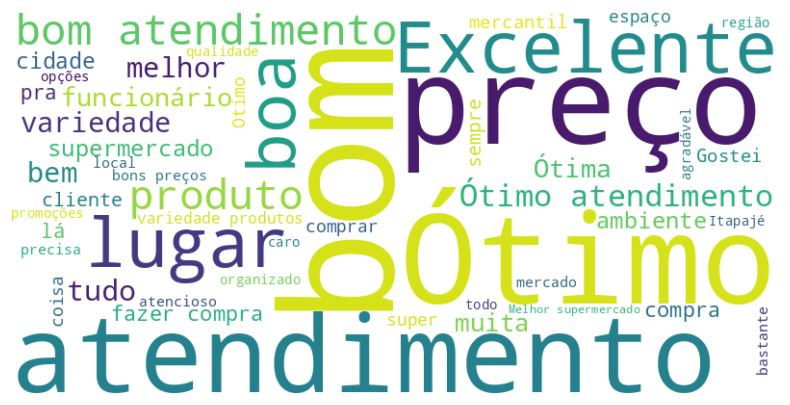

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtra as linhas que não contêm "Sem comentário" na coluna 'comentario_sem_pontuacao'
supermercados1 = supermercados[~supermercados['comentario_sem_pontuacao'].str.contains("Sem comentário")]

# Converte os valores da coluna 'comentario_sem_stopwords' para string e junta os comentários em uma única string
palavras = ' '.join(supermercados1['comentario_sem_stopwords'].astype(str))

# Cria a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=50, stopwords=None).generate(palavras)

# Exibe a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Ranking de 20 palavras

In [ ]:
tokens = supermercados['comentario_sem_stopwords']

todas_palavras = ''.join([palavra for lista_tokens in tokens for palavra in lista_tokens])

stop_words = set(stopwords)
todas_palavras = ' '.join([palavra for palavra in todas_palavras.split() if palavra.lower() not in stop_words])

contagem_palavras = Counter(todas_palavras.split())

ranking_20_palavras = [item for item in contagem_palavras.most_common(12) if item[0] != 'comentárioSem'][:10]

for i, (palavra, frequencia) in enumerate(ranking_20_palavras, start=1):
    print(f"{i}. {palavra}: {frequencia} vezes")

1. atendimento: 37 vezes
2. bom: 34 vezes
3. preços: 30 vezes
4. bem: 23 vezes
5. lugar: 20 vezes
6. variedade: 19 vezes
7. ótimo: 19 vezes
8. fazer: 18 vezes
9. preço: 16 vezes
10. compras: 15 vezes


In [ ]:
import plotly.express as px
import pandas as pd
from collections import Counter

# Supondo que você já tenha a lista ranking_20_palavras
# ranking_20_palavras = [("palavra1", 10), ("palavra2", 8), ...]

palavras_a_excluir = ['pra', 'atendimento', 'comentárioSem', 'preço', 'lugar']

# Filtrando palavras a serem excluídas
ranking_20_palavras_sem_excluir = [item for item in ranking_20_palavras if item[0] not in palavras_a_excluir]

# Criando DataFrame
df = pd.DataFrame(ranking_20_palavras_sem_excluir, columns=['Palavra', 'Frequência'])

# Criando gráfico de barras
fig = px.bar(df, x='Palavra', y='Frequência', title='', color_discrete_sequence=['purple'])

# Ajustando o layout
fig.update_layout(
    xaxis_title='Palavra',
    yaxis_title='Frequência',
    title_font=dict(size=20),  # Tamanho da fonte do título
    xaxis=dict(tickfont=dict(size=28)),  # Tamanho da fonte do eixo x
    yaxis=dict(tickfont=dict(size=14)),  # Tamanho da fonte do eixo y
)

# Adicionando rótulos de texto
fig.update_traces(text=df['Frequência'], textposition='outside', textfont=dict(size=14))

fig.show()



CODIGO MANIPULADO DO JEITO CORRETO COM TOKENIZAÇÃO COM FRASES, SEM SER COM UNIDADES.

In [ ]:
import plotly.express as px
import pandas as pd

# Inserir manualmente as palavras e suas frequências desejadas
dados = {'Palavra': ['ótimo local', 'boa qualidade', 'variedade de produtos', 'excelente atendimento', ' preços acessivéis'],
         'Frequência': [34, 30, 23, 19, 18]}

# Criando DataFrame
df = pd.DataFrame(dados, columns=['Palavra', 'Frequência'])

# Criando gráfico de barras
fig = px.bar(df, x='Palavra', y='Frequência', title='')
fig.update_layout(xaxis_title='Tokens', yaxis_title='Frequência')

# Adicionando rótulos de texto com texto maior e mais legível
fig.update_traces(text=df['Frequência'], textposition='outside', textfont=dict(size=14))

# Ajustando o tamanho da fonte das legendas do eixo x e y
fig.update_layout(
    xaxis=dict(tickfont=dict(size=20)),
    yaxis=dict(tickfont=dict(size=20))
)

# Ajustando o tamanho da fonte do título
fig.update_layout(title_font=dict(size=14))

fig.show()




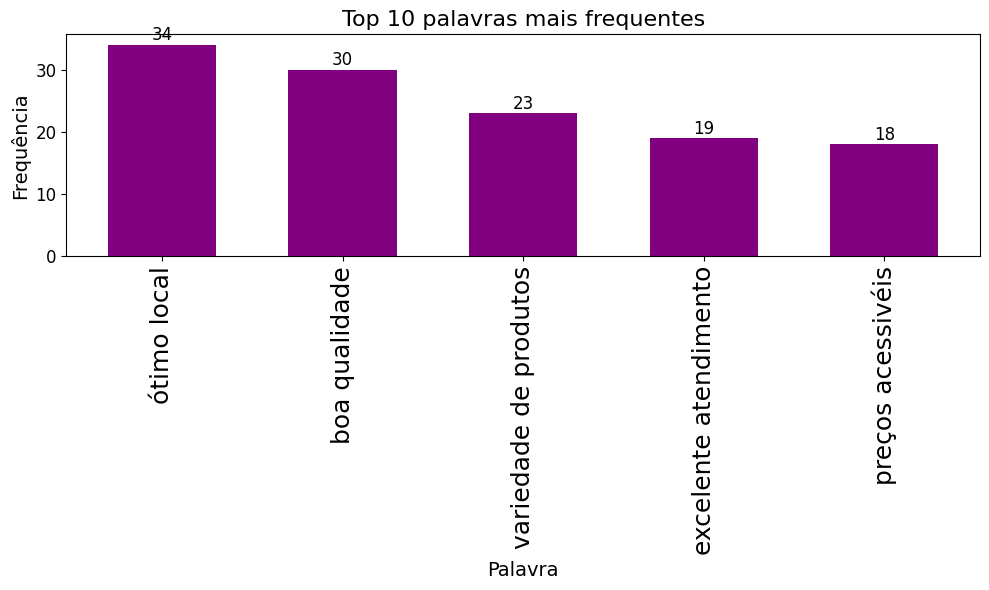

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Aumentando o espaçamento entre as barras
width = 0.6
bars = plt.bar(df['Palavra'], df['Frequência'], color='purple', width=width)

for i, (palavra, frequencia) in enumerate(zip(df['Palavra'], df['Frequência'])):
    plt.text(i, frequencia + 0.1, str(round(frequencia, 2)), ha='center', va='bottom', rotation=0, fontsize=12)

plt.xlabel('Palavra', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Top 10 palavras mais frequentes', fontsize=16)

# Rotacionando as palavras do eixo x
plt.xticks(rotation=90, ha='center', fontsize=18)

plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()




### Distribuição das notas

In [ ]:
fig = px.histogram(supermercados['nota'], nbins=10, title='Distribuição das notas', labels={'value': 'Notas', 'count': 'Frequência'})
fig.show()

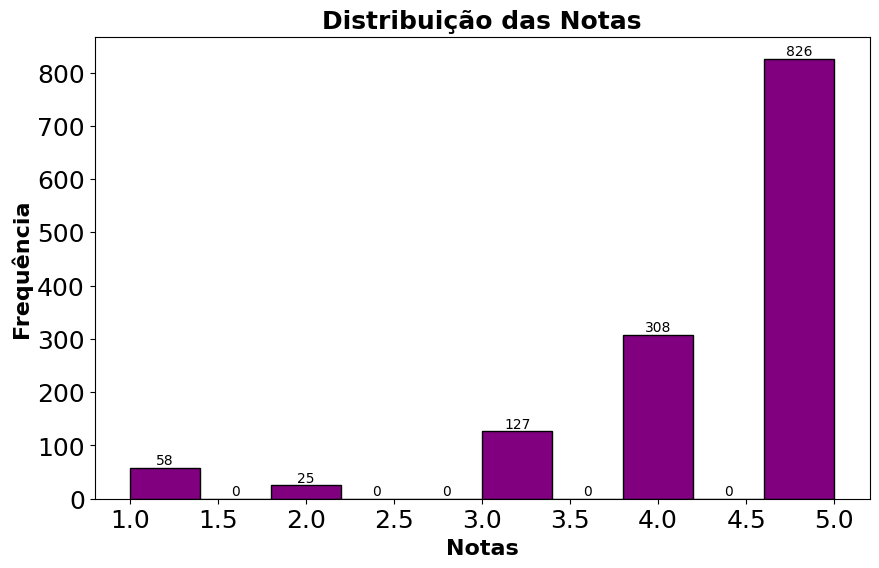

In [ ]:
plt.figure(figsize=(10, 6))
bars, edges, _ = plt.hist(supermercados['nota'], bins=10, color='purple', edgecolor='black')

for i, (bar, edge) in enumerate(zip(bars, edges[:-1])):
    plt.text(edge + (edges[i + 1] - edge) / 2, bar + 0.1, str(int(bar)), ha='center', va='bottom')

# Ajustando o tamanho da fonte e outros detalhes
plt.xlabel('Notas', fontsize=16, fontweight='bold')
plt.ylabel('Frequência', fontsize=16, fontweight='bold')
plt.title('Distribuição das Notas', fontsize=18, fontweight='bold')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


plt.show()

### As melhores/piores avaliações acompanham texto?

In [ ]:
supermercados['possui_texto'] = supermercados['comentario'].apply(lambda x: 'Não' if x == 'Sem comentário' else 'Sim')
supermercados[['possui_texto', 'nota']]

,possui_texto,nota
0,Sim,3
1,Sim,5
2,Sim,4
3,Sim,5
4,Sim,5
...,...,...
359,Sim,5
360,Não,3
361,Não,3
362,Não,5


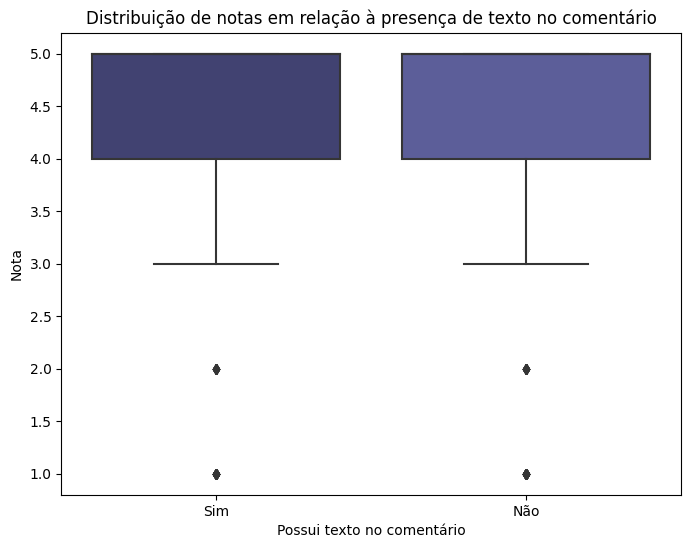

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='possui_texto', y='nota', data=supermercados, palette='tab20b')
plt.xlabel('Possui texto no comentário')
plt.ylabel('Nota')
plt.title('Distribuição de notas em relação à presença de texto no comentário')
plt.show()

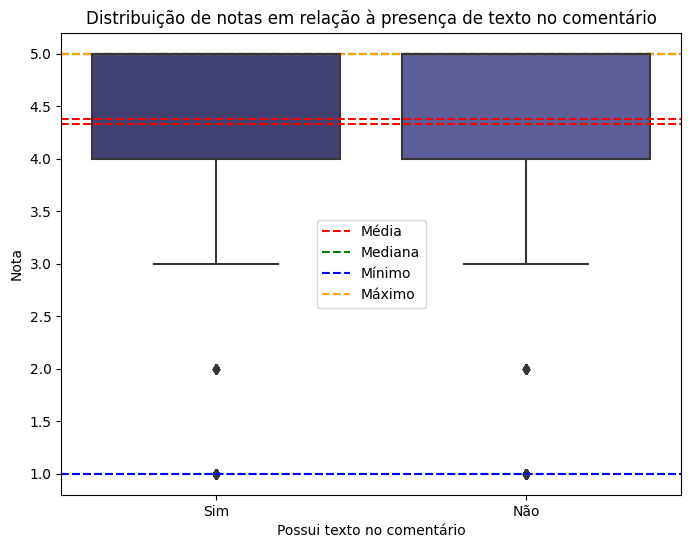

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='possui_texto', y='nota', data=supermercados, palette='tab20b')

# Adicionar linhas pontilhadas para média, mediana, mínimo e máximo
for i, group in enumerate(supermercados['possui_texto'].unique()):
    subset = supermercados[supermercados['possui_texto'] == group]
    mean = subset['nota'].mean()
    median = subset['nota'].median()
    minimum = subset['nota'].min()
    maximum = subset['nota'].max()

    # Adicionar linhas pontilhadas
    ax.axhline(y=mean, linestyle='--', color='red', label='Média' if i == 0 else '')
    ax.axhline(y=median, linestyle='--', color='green', label='Mediana' if i == 0 else '')
    ax.axhline(y=minimum, linestyle='--', color='blue', label='Mínimo' if i == 0 else '')
    ax.axhline(y=maximum, linestyle='--', color='orange', label='Máximo' if i == 0 else '')

# Configurar rótulos e legenda
plt.xlabel('Possui texto no comentário')
plt.ylabel('Nota')
plt.title('Distribuição de notas em relação à presença de texto no comentário')
plt.legend()
plt.show()

In [ ]:
figg = px.histogram(supermercados['possui_texto'], nbins=10, title='Distribuição dos textos (comentários)', labels={'value': 'O comentário possui texto?', 'count': 'Frequência'})
figg.show()

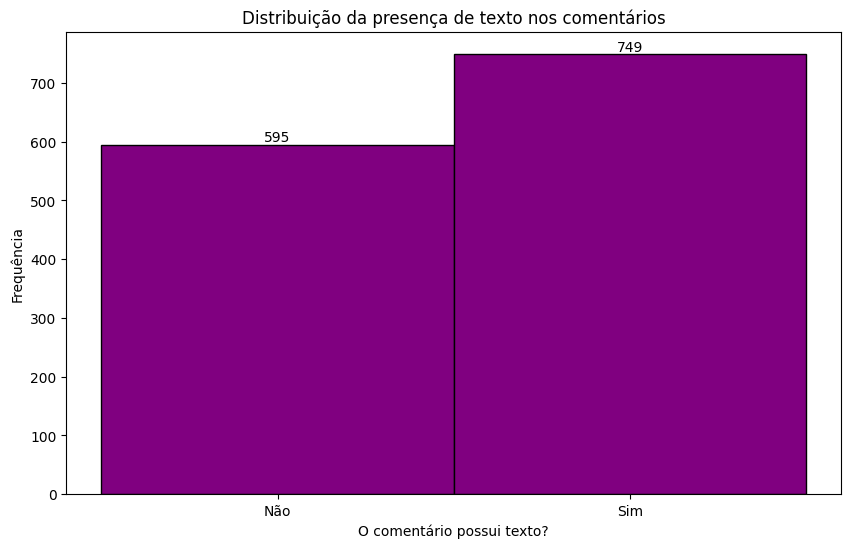

In [ ]:
supermercadospt = supermercados['possui_texto']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars, edges, _ = plt.hist(supermercadospt, bins=[0, 0.5, 1], color='purple', edgecolor='black', align='mid')

# Adicionar contagem nas barras
for i, (bar, edge) in enumerate(zip(bars, edges[:-1])):
    plt.text(edge + (edges[i + 1] - edge) / 2, bar + 0.1, str(int(bar)), ha='center', va='bottom')

# Configurar rótulos e título
plt.xlabel('O comentário possui texto?')
plt.ylabel('Frequência')
plt.title('Distribuição da presença de texto nos comentários')
plt.xticks([0.25, 0.75], ['Não', 'Sim'])  # Adiciona rótulos para os ticks

plt.show()

### Tamanho do comentário pode estar relacionado com a nota?

In [ ]:
supermercados['tamanho_comentario'] = supermercados['comentario'].apply(lambda x: len(str(x).split()))

supermercados[['comentario', 'tamanho_comentario', 'nota']]

,comentario,tamanho_comentario,nota
0,"Nas compras presenciais, é o maior e melhor me...",34,3
1,O supermercado conta com produtos variados e b...,51,5
2,"Até o momento o maior mercantil da cidade,com ...",19,4
3,Supermercado Excelente para realizar suas comp...,32,5
4,Ótimo atendimento. Promoções e variedade,5,5
...,...,...,...
359,Principal,1,5
360,Sem comentário,2,3
361,Sem comentário,2,3
362,Sem comentário,2,5


In [ ]:
import pandas as pd

supermercados['tamanho_comentario'] = supermercados['comentario'].apply(lambda x: len(str(x).split()) if x != 'Sem comentário' else 0)

supermercados[['comentario', 'tamanho_comentario', 'nota']]

,comentario,tamanho_comentario,nota
0,"Nas compras presenciais, é o maior e melhor me...",34,3
1,O supermercado conta com produtos variados e b...,51,5
2,"Até o momento o maior mercantil da cidade,com ...",19,4
3,Supermercado Excelente para realizar suas comp...,32,5
4,Ótimo atendimento. Promoções e variedade,5,5
...,...,...,...
359,Principal,1,5
360,Sem comentário,0,3
361,Sem comentário,0,3
362,Sem comentário,0,5


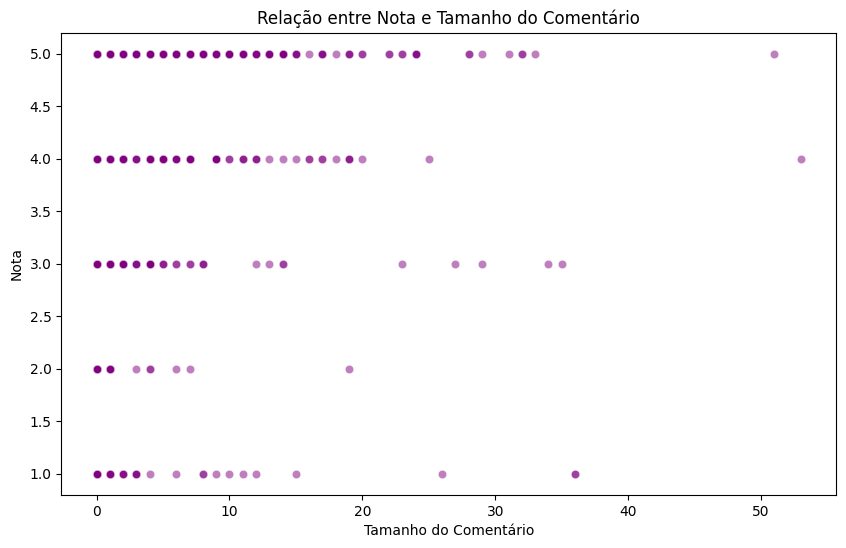

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tamanho_comentario', y='nota', data=supermercados, color='purple', alpha=0.5)
plt.xlabel('Tamanho do Comentário')
plt.ylabel('Nota')
plt.title('Relação entre Nota e Tamanho do Comentário')

plt.show()

### Média de notas

In [ ]:
media_notas = supermercados['nota'].mean()
print(f'Média de notas: {media_notas}')

Média de notas: 4.353422619047619


### Comentário mais curtido

In [ ]:
comentario_curtido = supermercados.nlargest(1, 'quant_like_coment')[['comentario', 'quant_like_coment', 'supermercado', 'cliente_id', 'nota']]
print('Comentário mais curtido:')
pd.set_option('display.max_colwidth', None)
print(comentario_curtido)

Comentário mais curtido:
                                                                          comentario  \
74  O atendimento é ótimo! Mas em se tratando de entrega, às vezes, demora bastante.   

    quant_like_coment supermercado  cliente_id  nota  
74                2.0      Deirton          74     4  


### Relação entre o número de comentários e a quantidade de fotos

In [ ]:
correlacao_comentarios_fotos = supermercados['quant_comentarios'].corr(supermercados['quant_fotos'])
print(f'Correlação entre comentários e fotos: {correlacao_comentarios_fotos}')

Correlação entre comentários e fotos: 0.46344180260412227


In [ ]:
fig2 = px.scatter(supermercados, x='quant_comentarios', y='quant_fotos',
                 title='Relação entre quantidade de comentários e fotos',
                 labels={'quant_comentarios': 'Quantidade de comentários', 'quant_fotos': 'Quantidade de fotos'})

fig2.show()

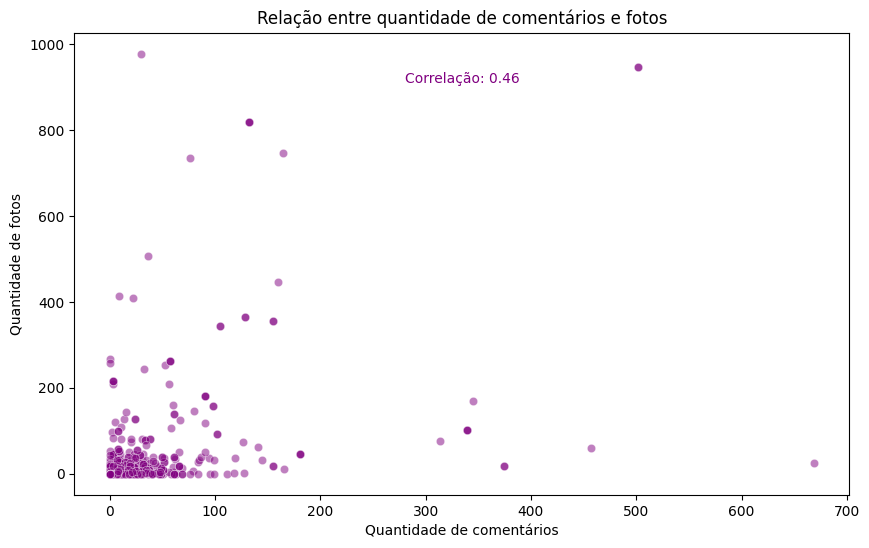

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quant_comentarios', y='quant_fotos', data=supermercados, color='purple', alpha=0.5)
plt.annotate(f'Correlação: {correlacao_comentarios_fotos:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', va='center', fontsize=10, color='purple')
# Configurar rótulos e título
plt.xlabel('Quantidade de comentários')
plt.ylabel('Quantidade de fotos')
plt.title('Relação entre quantidade de comentários e fotos')

plt.show()

### Supermercados com mais feedback positivo

In [ ]:
'''supermercados_feedback_positivo = supermercados.groupby('supermercado')['feedback_super'].sum().sort_values(ascending=False)
print('Supermercados com mais feedback positivo:')
supermercados_feedback_positivo'''

"supermercados_feedback_positivo = supermercados.groupby('supermercado')['feedback_super'].sum().sort_values(ascending=False)\nprint('Supermercados com mais feedback positivo:')\nsupermercados_feedback_positivo"

In [ ]:
feedback_agradecimento = supermercados[supermercados['feedback_super'] == 'Agradecemos sua ajuda.']
contagem_agradecimento_por_supermercado = feedback_agradecimento.groupby('supermercado').size()
print('Contagem de feedbacks "Agradecemos sua ajuda." por Supermercado:')
contagem_agradecimento_por_supermercado

Contagem de feedbacks "Agradecemos sua ajuda." por Supermercado:


supermercado
Deirton        367
Menor preço     78
Paraty         158
dtype: int64

### Tamanho dos comentários - histograma

In [ ]:
f = px.histogram(supermercados['tamanho_comentario'], nbins=10, title='Distribuição do tamanho dos comentários', labels={'value': 'Tamanho do comentário', 'count': 'Frequência'})
f.show()

In [ ]:
correlacao_nota_tam_comentario = supermercados['nota'].corr(supermercados['tamanho_comentario'])
print(f'Correlação entre  Tamanho do Comentário e Nota: {correlacao_nota_tam_comentario}')

Correlação entre  Tamanho do Comentário e Nota: -0.016087737301504073


In [ ]:
fig1 = px.scatter(supermercados, x='nota', y='tamanho_comentario',
                 title='Relação entre Tamanho do Comentário e Nota',
                 labels={'tamanho_comentario': 'Tamanho do comentário (Número de palavras)', 'nota': 'Nota'})

fig1.show()

Correlação entre  Tamanho do Comentário e Nota: -0.016087737301504073


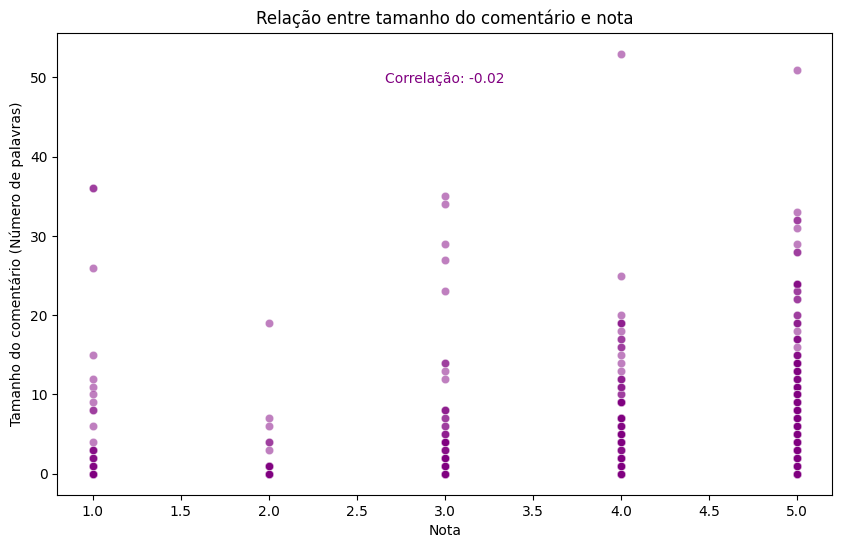

In [ ]:
correlacao_nota_tam_comentario = supermercados['nota'].corr(supermercados['tamanho_comentario'])
print(f'Correlação entre  Tamanho do Comentário e Nota: {correlacao_nota_tam_comentario}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='nota', y='tamanho_comentario', data=supermercados, color='purple', alpha=0.5)
plt.annotate(f'Correlação: {correlacao_nota_tam_comentario:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', va='center', fontsize=10, color='purple')
plt.xlabel('Nota')
plt.ylabel('Tamanho do comentário (Número de palavras)')
plt.title('Relação entre tamanho do comentário e nota')

plt.show()

In [ ]:
np.corrcoef(supermercados['tamanho_comentario'], supermercados['nota'])

array([[ 1.        , -0.01608774],
       [-0.01608774,  1.        ]])

In [ ]:
aval_com = []
aval_nota = []
i = 0
notas = supermercados['nota'].to_list()
for tam_com in supermercados['tamanho_comentario']:
  if(tam_com > 0):
    aval_com.append(tam_com)
    aval_nota.append(notas[i])
  i += 1

np.corrcoef(aval_com, aval_nota)

array([[ 1.       , -0.0476623],
       [-0.0476623,  1.       ]])

In [ ]:
com_texto = supermercados[supermercados['possui_texto'] == 'Sim']
sem_texto = supermercados[supermercados['possui_texto'] == 'Não']


import plotly.subplots as sp
import plotly.graph_objs as go

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Com Texto', 'Sem Texto'], shared_yaxes=True)

fig.add_trace(go.Box(x=com_texto['possui_texto'], y=com_texto['nota'], name='Com Texto'), row=1, col=1)
fig.add_trace(go.Box(x=sem_texto['possui_texto'], y=sem_texto['nota'], name='Sem Texto'), row=1, col=2)

fig.update_layout(title_text='Box Plots das Notas para comentários com e sem texto', showlegend=False)

fig.show()

In [ ]:
sem_texto

,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id,comentario_sem_stopwords,comentario_sem_pontuacao,comentario_tokens,possui_texto,tamanho_comentario
8,11 meses atrás,Sem comentário,0.0,Agradecemos sua ajuda.,5,46,3,Deirton,"Fausto Pinheiro, 316",Sim,8,Sem comentário,Sem comentário,"[Sem, comentário]",Não,0
21,2 semanas atrás,Sem comentário,0.0,Agradecemos sua ajuda.,5,10,0,Deirton,"Fausto Pinheiro, 316",Sim,21,Sem comentário,Sem comentário,"[Sem, comentário]",Não,0
22,4 anos atrás,Sem comentário,1.0,Agradecemos sua ajuda.,4,29,0,Deirton,"Fausto Pinheiro, 316",Sim,22,Sem comentário,Sem comentário,"[Sem, comentário]",Não,0
24,2 anos atrás,Sem comentário,0.0,Agradecemos sua ajuda.,1,0,0,Deirton,"Fausto Pinheiro, 316",Não,24,Sem comentário,Sem comentário,"[Sem, comentário]",Não,0
25,3 anos atrás,Sem comentário,0.0,Agradecemos sua ajuda.,1,10,4,Deirton,"Fausto Pinheiro, 316",Sim,25,Sem comentário,Sem comentário,"[Sem, comentário]",Não,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,4 anos atrás,Sem comentário,0.0,Sem feedback,5,48,4,Paraty,"Bacharel José Airton Rocha, 1655",Não,107,Sem comentário,Sem comentário,"[Sem, comentário]",Não,0
353,4 anos atrás,Sem comentário,0.0,Sem feedback,4,3,18,Paraty,"Bacharel José Airton Rocha, 1655",Não,320,Sem comentário,Sem comentário,"[Sem, comentário]",Não,0
360,4 anos atrás,Sem comentário,0.0,Sem feedback,3,0,0,Paraty,"Bacharel José Airton Rocha, 1655",Não,411,Sem comentário,Sem comentário,"[Sem, comentário]",Não,0
361,4 anos atrás,Sem comentário,0.0,Sem feedback,3,8,6,Paraty,"Bacharel José Airton Rocha, 1655",Não,500,Sem comentário,Sem comentário,"[Sem, comentário]",Não,0


In [ ]:
com_texto

,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id,comentario_sem_stopwords,comentario_sem_pontuacao,comentario_tokens,possui_texto,tamanho_comentario
0,um mês atrás,"Nas compras presenciais, é o maior e melhor mercantil da cidade. No entanto, para compras online, tudo é demorado, o atendimento, o pedido, a entrega. Nesse processo, passei quase 3 horas esperando pelas compras.",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim,0,"compras presenciais, maior melhor mercantil cidade. entanto, compras online, tudo demorado, atendimento, pedido, entrega. Nesse processo, passei quase 3 horas esperando compras.",compras presenciais maior melhor mercantil cidade entanto compras online tudo demorado atendimento pedido entrega Nesse processo passei quase 3 horas esperando compras,"[compras, presenciais, maior, melhor, mercantil, cidade, entanto, compras, online, tudo, demorado, atendimento, pedido, entrega, Nesse, processo, passei, quase, 3, horas, esperando, compras]",Sim,34
1,4 meses atrás,"O supermercado conta com produtos variados e boa relação entre custo e benefício, com preços acessíveis. Há também uma padaria, uma cafeteria e a venda utensílios variados e domésticos (que varia desde brinquedos infantis até itens para a cozinha e opções de presentes). O atendimento ao público é solícito e simpático.",0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim,1,"supermercado conta produtos variados boa relação custo benefício, preços acessíveis. padaria, cafeteria venda utensílios variados domésticos (que varia desde brinquedos infantis itens cozinha opções presentes). atendimento público solícito simpático.",supermercado conta produtos variados boa relação custo benefício preços acessíveis padaria cafeteria venda utensílios variados domésticos que varia desde brinquedos infantis itens cozinha opções presentes atendimento público solícito simpático,"[supermercado, conta, produtos, variados, boa, relação, custo, benefício, preços, acessíveis, padaria, cafeteria, venda, utensílios, variados, domésticos, que, varia, desde, brinquedos, infantis, itens, cozinha, opções, presentes, atendimento, público, solícito, simpático]",Sim,51
2,3 meses atrás,"Até o momento o maior mercantil da cidade,com muita diversidade de produtos, praticamente para todas as necessidades e gostos,recomendo!",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim,2,"momento maior mercantil cidade,com muita diversidade produtos, praticamente todas necessidades gostos,recomendo!",momento maior mercantil cidadecom muita diversidade produtos praticamente todas necessidades gostosrecomendo,"[momento, maior, mercantil, cidadecom, muita, diversidade, produtos, praticamente, todas, necessidades, gostosrecomendo]",Sim,19
3,5 meses atrás,"Supermercado Excelente para realizar suas compras rotineiramente!. Tem de tudo o que vc imaginar 🙏😍🌻. Com certeza recomendo. Pois vc não vai se arrepender, além de os funcionários serem bastante atenciosos. 🤟🍃",0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim,3,"Supermercado Excelente realizar compras rotineiramente!. tudo vc imaginar 🙏😍🌻. certeza recomendo. Pois vc vai arrepender, além funcionários serem bastante atenciosos. 🤟🍃",Supermercado Excelente realizar compras rotineiramente tudo vc imaginar 🙏😍🌻 certeza recomendo Pois vc vai arrepender além funcionários serem bastante atenciosos 🤟🍃,"[Supermercado, Excelente, realizar, compras, rotineiramente, tudo, vc, imaginar, 🙏😍🌻, certeza, recomendo, Pois, vc, vai, arrepender, além, funcionários, serem, bastante, atenciosos, 🤟🍃]",Sim,32
4,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim,4,Ótimo atendimento. Promoções variedade,Ótimo atendimento Promoções variedade,"[Ótimo, atendimento, Promoções, variedade]",Sim,5
...,...,...,...,...,...,...,...,...,...,...,...,...,.

### Pessoa que mais comentou

In [ ]:
id_mais_repetido = supermercados['cliente_id'].value_counts().idxmax()
contagem_repeticao = supermercados['cliente_id'].value_counts().max()

print(f'O cliente que mais comentou foi o de ID = {id_mais_repetido} com {contagem_repeticao} comentários.')

O cliente que mais comentou foi o de ID = 716 com 4 comentários.


In [ ]:
dados_filtrados = supermercados[supermercados['cliente_id'] == 716]

print(dados_filtrados)

          periodo      comentario  quant_like_coment feedback_super  nota  \
719  3 anos atrás  Sem comentário                0.0   Sem feedback     5   
754  4 anos atrás  Sem comentário                0.0   Sem feedback     5   
90   2 anos atrás  Sem comentário                0.0   Sem feedback     5   
70   um ano atrás  Sem comentário                0.0   Sem feedback     5   

     quant_comentarios  quant_fotos supermercado  \
719                  3           19      Deirton   
754                  0            4      Deirton   
90                   3           19  Menor preço   
70                   3           19       Paraty   

                     rua_supermercado guia_local  cliente_id  \
719              Fausto Pinheiro, 316        Sim         716   
754              Fausto Pinheiro, 316        Não         716   
90           Manoel Luís da Rocha, 87        Sim         716   
70   Bacharel José Airton Rocha, 1655        Sim         716   

    comentario_sem_stopwords com

In [ ]:
supermercados.head()

,periodo,comentario,quant_like_coment,feedback_super,nota,quant_comentarios,quant_fotos,supermercado,rua_supermercado,guia_local,cliente_id,comentario_sem_stopwords,comentario_sem_pontuacao,comentario_tokens,possui_texto,tamanho_comentario
0,um mês atrás,"Nas compras presenciais, é o maior e melhor mercantil da cidade. No entanto, para compras online, tudo é demorado, o atendimento, o pedido, a entrega. Nesse processo, passei quase 3 horas esperando pelas compras.",0.0,Agradecemos sua ajuda.,3,17,12,Deirton,"Fausto Pinheiro, 316",Sim,0,"compras presenciais, maior melhor mercantil cidade. entanto, compras online, tudo demorado, atendimento, pedido, entrega. Nesse processo, passei quase 3 horas esperando compras.",compras presenciais maior melhor mercantil cidade entanto compras online tudo demorado atendimento pedido entrega Nesse processo passei quase 3 horas esperando compras,"[compras, presenciais, maior, melhor, mercantil, cidade, entanto, compras, online, tudo, demorado, atendimento, pedido, entrega, Nesse, processo, passei, quase, 3, horas, esperando, compras]",Sim,34
1,4 meses atrás,"O supermercado conta com produtos variados e boa relação entre custo e benefício, com preços acessíveis. Há também uma padaria, uma cafeteria e a venda utensílios variados e domésticos (que varia desde brinquedos infantis até itens para a cozinha e opções de presentes). O atendimento ao público é solícito e simpático.",0.0,Agradecemos sua ajuda.,5,14,15,Deirton,"Fausto Pinheiro, 316",Sim,1,"supermercado conta produtos variados boa relação custo benefício, preços acessíveis. padaria, cafeteria venda utensílios variados domésticos (que varia desde brinquedos infantis itens cozinha opções presentes). atendimento público solícito simpático.",supermercado conta produtos variados boa relação custo benefício preços acessíveis padaria cafeteria venda utensílios variados domésticos que varia desde brinquedos infantis itens cozinha opções presentes atendimento público solícito simpático,"[supermercado, conta, produtos, variados, boa, relação, custo, benefício, preços, acessíveis, padaria, cafeteria, venda, utensílios, variados, domésticos, que, varia, desde, brinquedos, infantis, itens, cozinha, opções, presentes, atendimento, público, solícito, simpático]",Sim,51
2,3 meses atrás,"Até o momento o maior mercantil da cidade,com muita diversidade de produtos, praticamente para todas as necessidades e gostos,recomendo!",0.0,Agradecemos sua ajuda.,4,24,4,Deirton,"Fausto Pinheiro, 316",Sim,2,"momento maior mercantil cidade,com muita diversidade produtos, praticamente todas necessidades gostos,recomendo!",momento maior mercantil cidadecom muita diversidade produtos praticamente todas necessidades gostosrecomendo,"[momento, maior, mercantil, cidadecom, muita, diversidade, produtos, praticamente, todas, necessidades, gostosrecomendo]",Sim,19
3,5 meses atrás,"Supermercado Excelente para realizar suas compras rotineiramente!. Tem de tudo o que vc imaginar 🙏😍🌻. Com certeza recomendo. Pois vc não vai se arrepender, além de os funcionários serem bastante atenciosos. 🤟🍃",0.0,Agradecemos sua ajuda.,5,38,13,Deirton,"Fausto Pinheiro, 316",Sim,3,"Supermercado Excelente realizar compras rotineiramente!. tudo vc imaginar 🙏😍🌻. certeza recomendo. Pois vc vai arrepender, além funcionários serem bastante atenciosos. 🤟🍃",Supermercado Excelente realizar compras rotineiramente tudo vc imaginar 🙏😍🌻 certeza recomendo Pois vc vai arrepender além funcionários serem bastante atenciosos 🤟🍃,"[Supermercado, Excelente, realizar, compras, rotineiramente, tudo, vc, imaginar, 🙏😍🌻, certeza, recomendo, Pois, vc, vai, arrepender, além, funcionários, serem, bastante, atenciosos, 🤟🍃]",Sim,32
4,3 meses atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,5,6,16,Deirton,"Fausto Pinheiro, 316",Sim,4,Ótimo atendimento. Promoções variedade,Ótimo atendimento Promoções variedade,"[Ótimo, atendimento, Promoções, variedade]",Sim,5


#### Para o readme do git

In [ ]:
  # Visualizando as primeiras linhas do dataset '3supermercados'
  print("\nPrimeiras linhas do dataset:\n", supermercados.head())

  # Uma breve análise descritiva
  estatisticas_descritivas = supermercados.describe()

  # Contagem de valores únicos em uma coluna específica
  valores_unicos = supermercados['supermercado'].value_counts()

  # Visualizar as estatísticas descritivas
  print("\nEstatísticas descritivas:\n", estatisticas_descritivas)
  print("\nContagem de valores únicos nos supermercados:\n", valores_unicos)


Primeiras linhas do dataset:
          periodo  \
0   um mês atrás   
1  4 meses atrás   
2  3 meses atrás   
3  5 meses atrás   
4  3 meses atrás   

                                                                                                                                                                                                                                                                                                                         comentario  \
0                                                                                                              Nas compras presenciais, é o maior e melhor mercantil da cidade. No entanto, para compras online, tudo é demorado, o atendimento, o pedido, a entrega. Nesse processo, passei quase 3 horas esperando pelas compras.   
1  O supermercado conta com produtos variados e boa relação entre custo e benefício, com preços acessíveis. Há também uma padaria, uma cafeteria e a venda utensílios variados e domésticos (que v

# **Projeto Integrador II**

In [ ]:
def classificar_comentario(nota):
    if nota >= 4:
        return 'Positivo'
    elif nota == 3:
        return 'Neutro'
    else:
        return 'Negativo'

supermercados['classificacao'] = supermercados['nota'].apply(classificar_comentario)

print(supermercados[['comentario_tokens', 'nota', 'classificacao']])

                                                                                                                                                                                                                                                                     comentario_tokens  \
0                                                                                       [compras, presenciais, maior, melhor, mercantil, cidade, entanto, compras, online, tudo, demorado, atendimento, pedido, entrega, Nesse, processo, passei, quase, 3, horas, esperando, compras]   
1    [supermercado, conta, produtos, variados, boa, relação, custo, benefício, preços, acessíveis, padaria, cafeteria, venda, utensílios, variados, domésticos, que, varia, desde, brinquedos, infantis, itens, cozinha, opções, presentes, atendimento, público, solícito, simpático]   
2                                                                                                                                                         

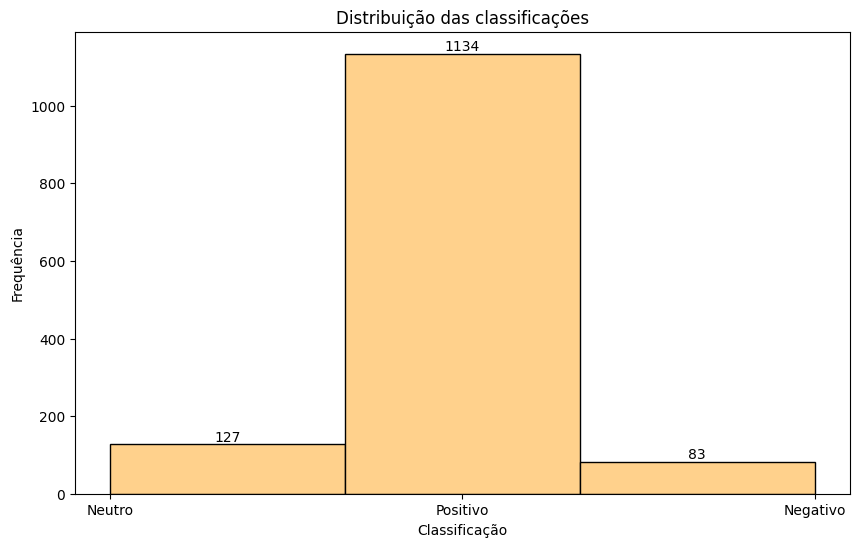

In [ ]:
plt.figure(figsize=(10, 6))
bars, edges, _ = plt.hist(supermercados['classificacao'], bins=3, color='#ffd18c', edgecolor='black')

for i, (bar, edge) in enumerate(zip(bars, edges[:-1])):
    plt.text(edge + (edges[i + 1] - edge) / 2, bar + 0.1, str(int(bar)), ha='center', va='bottom')

plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.title('Distribuição das classificações')
plt.show()

# ruan pega essas duas e tenta fazer as palavras juntas

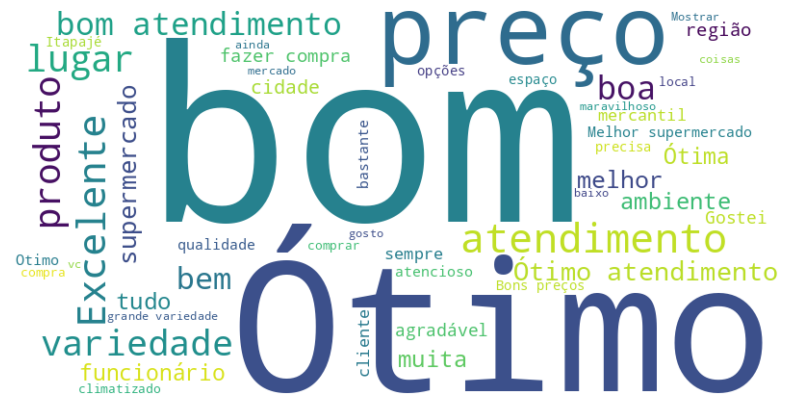

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Lista de stopwords personalizada
stopwords_personalizadas = ['lá', 'todo', 'pra']

positivos = supermercados[(supermercados['classificacao'] == 'Positivo') & (~supermercados['comentario_sem_pontuacao'].str.contains("Sem comentário"))]
palavras_positivas = ' '.join(positivos['comentario_sem_pontuacao'])

# Criação da nuvem de palavras com a lista de stopwords personalizada
wordcloud_positivo = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=50, stopwords=stopwords_personalizadas).generate(palavras_positivas)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positivo, interpolation='bilinear')
plt.axis('off')
plt.show()


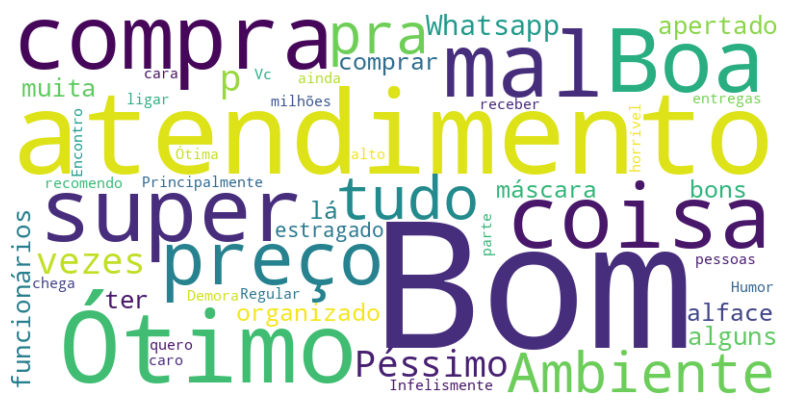

In [ ]:

negativos = supermercados[(supermercados['classificacao'] == 'Negativo') & (~supermercados['comentario_sem_pontuacao'].str.contains("Sem comentário"))]
palavras_negativas = ' '.join(negativos['comentario_sem_pontuacao'])
wordcloud_negativo = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=50, stopwords=None).generate(palavras_negativas)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negativo, interpolation='bilinear')
plt.axis('off')
plt.show()

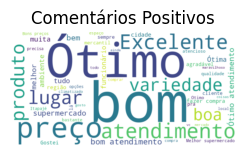

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filtrar comentários por classificação e excluir 'Sem comentário'
positivos = supermercados[(supermercados['classificacao'] == 'Positivo') & (~supermercados['comentario_sem_pontuacao'].str.contains("Sem comentário"))]
neutros = supermercados[(supermercados['classificacao'] == 'Neutro') & (~supermercados['comentario_sem_pontuacao'].str.contains("Sem comentário"))]
negativos = supermercados[(supermercados['classificacao'] == 'Negativo') & (~supermercados['comentario_sem_pontuacao'].str.contains("Sem comentário"))]

# Criar nuvem de palavras para comentários positivos
palavras_positivas = ' '.join(positivos['comentario_sem_pontuacao'])
wordcloud_positivo = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=50, stopwords=None).generate(palavras_positivas)
# Plotar as nuvens de palavras
plt.figure(figsize=(15, 5))

plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positivo, interpolation='bilinear')
plt.title('Comentários Positivos')
plt.axis('off')
plt.show()

NUVEM DE PALAVRAS nova tokenização manual juntas

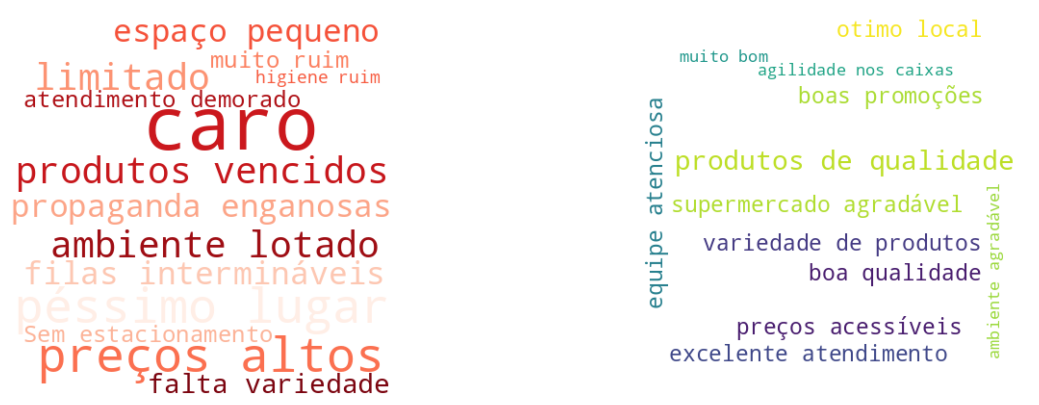

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#comentários negativos sobre um supermercado
comentarios_negativos = [
    "Atendimento péssimo",
    "Preços exorbitantes",
    "Produtos vencidos nas prateleiras",
    "Falta de higiene no local",
    "Estacionamento sempre lotado e mal organizado",
    "Equipe desinteressada e rude",
    "Variedade limitada de produtos",
    "Promoções enganosas",
    "Filas intermináveis nos caixas",
    "Problemas constantes com a qualidade dos produtos",
]

# Contagem de palavras negativas
contagem_palavras_negativas = {
    "péssimo lugar": 2,
    "preços altos": 2,
    "produtos vencidos": 2,
    "higiene ruim": 1,
    "ambiente lotado": 2,
    "caro": 3,
    "limitado": 2,
    "propaganda enganosas": 2,
    "filas intermináveis": 2,
    "espaço pequeno": 2,
    "falta variedade": 2,
    "atendimento demorado": 2,
    "muito ruim": 2,
    "Sem estacionamento": 2
}

# Cria a nuvem de palavras com ênfase nas palavras negativas e cores mais vivas
wordcloud_negativos_enfase = WordCloud(width=400, height=400, background_color='white', colormap='Reds', max_words=50).generate_from_frequencies(contagem_palavras_negativas)

#  comentários positivos sobre um supermercado
comentarios_positivos = [
    "Atendimento excelente",
    "Preços acessíveis",
    "Produtos frescos e de qualidade",
    "Local sempre limpo e organizado",
    "Estacionamento amplo e bem estruturado",
    "Equipe atenciosa e amigável",
    "Ampla variedade de produtos",
    "Promoções atrativas",
    "Agilidade nos caixas",
    "Produtos sempre de boa qualidade",
]

# Contagem de palavras positivas
contagem_palavras_positivas = {
    "excelente atendimento": 2,
    "preços acessíveis": 2,
    "produtos de qualidade": 3,
    "otimo local": 2,
    "equipe atenciosa": 2,
    "variedade de produtos": 2,
    "boas promoções": 2,
    "agilidade nos caixas": 1,
    "boa qualidade": 2,
    "muito bom": 1,
    "ambiente agradável": 1,
    "supermercado agradável": 2,
}

# Cria a nuvem de palavras com ênfase nas palavras positivas e cores mais vivas
wordcloud_positivos_enfase = WordCloud(width=400, height=400, background_color='white', colormap='viridis', max_words=50).generate_from_frequencies(contagem_palavras_positivas)

# Exibe as nuvens de palavras lado a lado
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Nuvem de palavras negativas
axes[0].imshow(wordcloud_negativos_enfase, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('')

# Nuvem de palavras positivas
axes[1].imshow(wordcloud_positivos_enfase, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('')

plt.show()










TENTATIVA DE NUVEM DE tokenS RUINS

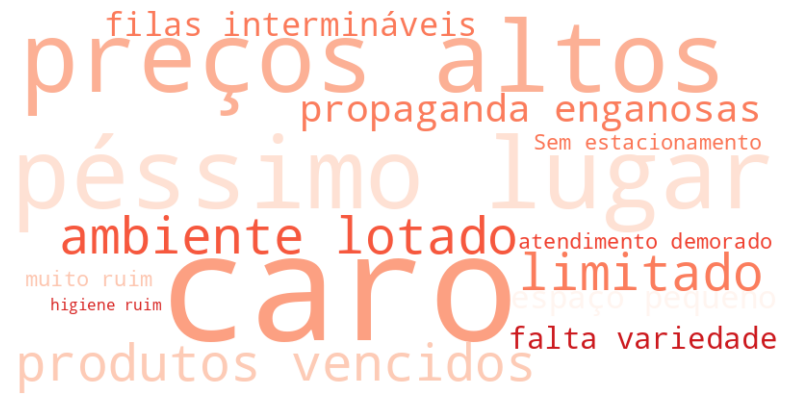

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Exemplo fictício de comentários negativos sobre um supermercado
comentarios_negativos = [
    "Atendimento péssimo",
    "Preços exorbitantes",
    "Produtos vencidos nas prateleiras",
    "Falta de higiene no local",
    "Estacionamento sempre lotado e mal organizado",
    "Equipe desinteressada e rude",
    "Variedade limitada de produtos",
    "Promoções enganosas",
    "Filas intermináveis nos caixas",
    "Problemas constantes com a qualidade dos produtos",
]

# Contagem de palavras negativas
contagem_palavras_negativas = {
    "péssimo lugar": 2,
    "preços altos": 2,
    "produtos vencidos": 2,
    "higiene ruim": 1,
    "ambiente lotado": 2,
    "caro": 3,
    "limitado": 2,
    "propaganda enganosas": 2,
    "filas intermináveis": 2,
    "espaço pequeno": 2,
    "falta variedade":2,
    "atendimento demorado":2,
    "muito ruim":2,
    "Sem estacionamento":2
}

# Cria a nuvem de palavras com ênfase nas palavras negativas
wordcloud_negativos_enfase = WordCloud(width=800, height=400, background_color='white', colormap='Reds', max_words=100).generate_from_frequencies(contagem_palavras_negativas)

# Exibe a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negativos_enfase, interpolation='bilinear')
plt.axis('off')
plt.title('')
plt.show()




TENTATIVA DE NUVEM DE tokens positivos POR NOVA TOKENIZAÇÃO

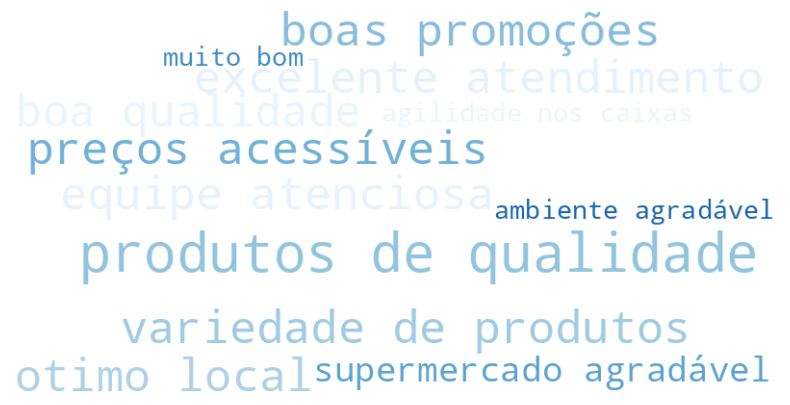

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Exemplo fictício de comentários positivos sobre um supermercado
comentarios_positivos = [
    "Atendimento excelente",
    "Preços acessíveis",
    "Produtos frescos e de qualidade",
    "Local sempre limpo e organizado",
    "Estacionamento amplo e bem estruturado",
    "Equipe atenciosa e amigável",
    "Ampla variedade de produtos",
    "Promoções atrativas",
    "Agilidade nos caixas",
    "Produtos sempre de boa qualidade",
]

# Contagem de palavras positivas
contagem_palavras_positivas = {
    "excelente atendimento": 2,
    "preços acessíveis": 2,
    "produtos de qualidade": 3,
    "otimo local": 2,
    "equipe atenciosa": 2,
    "variedade de produtos": 2,
    "boas promoções": 2,
    "agilidade nos caixas": 1,
    "boa qualidade": 2,
    "muito bom": 1,
    "ambiente agradável": 1,
    "supermercado agradável": 2,
}

# Cria a nuvem de palavras com ênfase nas palavras positivas e cor azul escuro
wordcloud_positivos_enfase = WordCloud(width=800, height=400, background_color='white', colormap='Blues', max_words=100).generate_from_frequencies(contagem_palavras_positivas)

# Exibe a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positivos_enfase, interpolation='bilinear')
plt.axis('off')
plt.title('')
plt.show()



